# <b>Linear regression from scrath in Python</b>

This notebook focuses on implementing <b>Linear Regression (LR)</b> from scratch.
Although there are many frameworks that allow implementing linear regression algorithm in a few lines of code, implementing the algorithm from scratch helps one to better understand its inner workings.

# <b>Dataset</b>

The task of our algorithm is to predict the sale price of a house. This is a standard supervised regression task:
- <b>Supervised</b> - The training data is `labeled` i.e. the algorithm knows the selling price of the houses included in the training data;
- <b>Regression</b> - algorithm will predict a continuous value (i.e. sale price).

<br>The training dataset consists of:
- Input variables, also called <b>features</b>:
>- GrLivArea - size of living area in square feet;
>- TotalBsmtSF - size of basement area in square feet;
>- GarageCars - size of garage in car capacity;
- Labels: Sale price.

For training the algorithm we will be using a simplified version of *Ames Housing dataset* </b> found <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">here</a>.

<b><u>Import dataset</u></b>:

In [1]:
# IMPORTS

# Pandas is a wide used library for data manipulations.
import pandas as pd    

# Used for spliting the dataset
from sklearn.model_selection import train_test_split 

# Used for scaling inputs
from sklearn.preprocessing import MinMaxScaler

# Great library for linear algebra operations
import numpy as np             

# Suppres scientific notation in numpy
np.set_printoptions(suppress=True)     

# Library used for data visualization
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./Data/house_price.csv")

In [3]:
dataset.head(5)       # View first 5 rows of the dataset 

,GrLivArea,TotalBsmtSF,GarageCars,SalePrice
0,1710.0,856.0,2.0,208500
1,1262.0,1262.0,2.0,181500
2,1786.0,920.0,2.0,223500
3,1717.0,756.0,3.0,140000
4,2198.0,1145.0,3.0,250000


We split the data in features and labels

In [4]:
X = dataset.drop("SalePrice", axis=1)
X.head()

,GrLivArea,TotalBsmtSF,GarageCars
0,1710.0,856.0,2.0
1,1262.0,1262.0,2.0
2,1786.0,920.0,2.0
3,1717.0,756.0,3.0
4,2198.0,1145.0,3.0


In [5]:
Y = dataset.SalePrice
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<b><u>Input scaling</u></b>:

In [6]:
feature_scaler = MinMaxScaler()
feature_scaler.fit(X)
X = feature_scaler.transform(X)

In [7]:
label_scaler = MinMaxScaler()
label_scaler.fit(Y.to_numpy().reshape(-1,1))
Y = label_scaler.transform(Y.to_numpy().reshape(-1,1))

<b><u>Train/test split</u></b>:

We split data in training data and test data. 

We need test data because we want to check how the algorithm performs on previously unseen data.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800, 1), (200, 1))

Now we have the dataset splited:
- 800 train examples;
- 200 test examples.

# <b>Theory</b>

First, we have to decide how we are going to represent the hypothesis function used to predict Y (i.e. house price).

For the purpose of this notebook we will use the following function:

$ h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} $;
<br>
where $x_{i}$ represent the features:
- $x_{1}$ - GrLivArea
- $x_{2}$ - TotalBsmtSF
- $x_{3}$ - GarageCars

and $\theta_{i}$`s represent the <b>parameters</b> (also called <b>weights</b>) parameterizing the
space of linear functions mapping from $X$ to $Y$.

To simplify the  notation, we introduce the convention of letting $x_0$ = 1:

$ h(x) = \sum\limits _{j=1} ^{p}{\theta_{i}x_{i}} = \theta^{T}x$

In [ ]:
# Add a column x_0 = 1
x_train = np.append(np.ones((800,1)), x_train, axis=1)
x_test = np.append(np.ones((200,1)), x_test, axis=1)
x_train.shape, x_test.shape

((800, 4), (200, 4))

For the purpose of learning, we need to pick parameters $\theta$ so that $h(x)$ gets as closer as possible to $Y$. So we declare a <b>cost function</b> that will measure, for given value of $\theta$ how close $h(x)$ is to $Y$.

$J(\theta) = \frac{1}{2} \sum \limits _{i=1} ^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}  
$

$m$ - denotes total number of training examples

Our task now is to find the values of $\theta$ so that $J(\theta)$ will have a minimal value.

To do so, we will start with some random initial values for $\theta$ and then will make some small changes to $\theta$ until $J(\theta)$ will have a minimal value.
For this purpose, we will use <b>stochastic (i.e. incremental) gradient descent</b> algorithm, which repeatedly performs the updates to $\theta$ after computing derivatives for each training example:


$\theta_{j} := \theta_{j} - \alpha \frac {\partial}{\partial \theta_{j}}J(\theta)$

$\Leftrightarrow$

$\theta_{j}:=\theta_{j} + \alpha(y^{(i)} - h(x^{(i)}))x_{j}^{(i)}$ (for every $j$)

$\alpha$ is called <b>learning rate</b> and allows us to configure how significant are the changes applied to $\theta$.

There is also <b>batch gradient descent</b>, which computes partial derivatives using all training examples before applying changes to $\theta$. Its formula is:

$\theta_{j}:=\theta_{j} + \alpha \sum \limits _{i=1} ^{m} (y^{(i)} - h(x^{(i)}))x_{j}^{(i)}$

# <b>Code for Stochastic Gradient Descent</b>

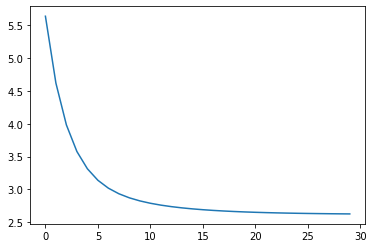

In [120]:
# Initalize theta with zeros
theta_stochastic_gd = np.zeros(4)

# Hyperparameters
alpha = 0.01             # Learning rate
epochs = 30              # Number of epochs

# Variables used for visualizing cost
all_costs = []
 
for _ in range(epochs):
    
    for i in range(len(x_train)):
        x = x_train[i]
        y = y_train[i]
        h_x = x@theta_stochastic_gd
        theta_stochastic_gd = theta_stochastic_gd + alpha * (y - h_x)*x        
        
    y_pred = x_train@theta_stochastic_gd.reshape(-1,1)   
    all_costs.append(sum((y_pred - y_train) * (y_pred - y_train)))
    
plt.plot(all_costs)

# <b>Code for Batch Gradient Descent</b>

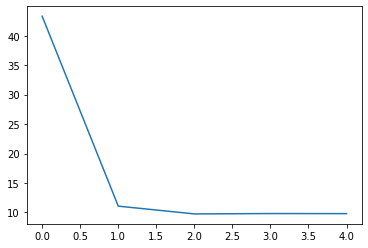

In [121]:
# Initalize theta with zeros
theta_batch_gd = np.zeros(4)


# Hyperparameters
alpha = 0.001            # Learning rate
epochs = 5              # Number of epochs

# Variables used for visualizing
all_costs = []
cost_sum = 0

for _ in range(epochs):
    
    h_x = (x@theta_batch_gd).reshape(-1,1)
    
    theta_batch_gd = theta_batch_gd + alpha * sum((((y_train-h_x))*x_train))

    # Lines of code used for visualizing cost
    all_costs.append(sum((h_x - y_train)*(h_x - y_train)))
    
plt.plot(all_costs)

# <b>Code for normal equation</b>

For linear regression, we can minimize $J(\theta)$ by computing derivateves iteratively, as we have done above, or we can minimize it by taking $ \frac {\partial} {\partial \theta}  J(\theta) = 0$.

The formula for computing this using linear algebra is: <br>
$ \nabla_{\theta} J(\theta) = X^{T}X\theta - X^{T}Y $

In [122]:
theta_normal_eq = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

# <b>Comparing parameters $\theta$ calculated with different methods</b>

In [123]:
print("Theta computed with sochastic gradient descent \n", theta_stochastic_gd) 
print("\nTheta computed with batch gradient descent \n", theta_batch_gd) 
print("\nTheta computed with normal equation \n", theta_normal_eq.reshape(1,-1)) 

Theta computed with sochastic gradient descent 
 [-0.06972346  0.41163631  0.24384649  0.19178448]

Theta computed with batch gradient descent 
 [0.11238267 0.06990852 0.07306135 0.10342615]

Theta computed with normal equation 
 [[-0.07351101  0.44157478  0.24215959  0.17759184]]


As we can see, for this dataset,  the parameters calculated using Stochasting Gradient Descent turned out to be the closes ones to those calculated using Normal Equation.

Thats all for this notebook. For an indepth introduction to <b>Machine Learning</b> and specifically <b>LR</b>  please see Andrew NG\`s`lecture (<a href="https://www.youtube.com/watch?v=4b4MUYve_U8">video</a>) and its notes (<a href="https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf">.pdf</a>).